# Testing functions in epydemiology

## Import epydemiology
(All other packages will be imported or reported missing.)

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd

import epydemiology as epy

## Some background details

In [3]:
help(epy)

Help on package epydemiology:

NAME
    epydemiology

DESCRIPTION
    # These are the functions that can be accessed from epydemiology.
    # Other functions that are used internally cannot be accessed
    # directly by end-users.

PACKAGE CONTENTS
    phjCalculateProportions
    phjCleanData
    phjCleanUKPostcodes
    phjExploreData
    phjExtFuncs
    phjGetDBData
    phjGetData
    phjMatrices
    phjMiscFuncs
    phjRROR
    phjSelectData
    phjTestFunctionParameters

FILE
    /Users/philipjones/Documents/git_repositories/epydemiology/epydemiology/__init__.py




In [4]:
print(dir(epy))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'getJenksBreaks', 'phjAnnualDiseaseTrend', 'phjBinaryVarsToSquareMatrix', 'phjCalculateBinomialConfInts', 'phjCalculateBinomialProportions', 'phjCalculateMultinomialProportions', 'phjCalculateProportions', 'phjCategoriseContinuousVariable', 'phjCleanData', 'phjCleanUKPostcodeVariable', 'phjCleanUKPostcodes', 'phjCollapseOnPatientID', 'phjConnectToDatabase', 'phjCreateNamedGroupRegex', 'phjExploreData', 'phjExtFuncs', 'phjFindRegexNamedGroups', 'phjGenerateCaseControlDataset', 'phjGetDBData', 'phjGetData', 'phjGetDataFromDatabase', 'phjGetStrFromArgOrFile', 'phjLongToWideBinary', 'phjMatrices', 'phjMaxLevelOfTaxonomicDetail', 'phjMiscFuncs', 'phjOddsRatio', 'phjParseDateVar', 'phjPostcodeFormat7', 'phjRROR', 'phjReadDataFromExcelNamedCellRange', 'phjReadTextFromFile', 'phjRelativeRisk', 'phjReverseMap', 'phjSelectCaseControlDataset', 'phjSelectData', 'phjSummaryTableToB

---

## FILE: phjGetData

### FUNCTION: phjReadDataFromExcelNamedCellRange()

In [6]:
phjPath = "/Users/philipjones/Documents/git_repositories/epydemiology"
phjFileName = "Test data.xlsx"

import pandas as pd
import openpyxl
import epydemiology as epy

print("RANGE: some_test_data")
print("=====================")
myDF = epy.phjReadDataFromExcelNamedCellRange(phjExcelPathAndFileName = '/'.join([phjPath,phjFileName]),
                                              phjExcelCellRangeName = 'some_test_data',
                                              phjDatetimeFormat = "%d%b%Y",
                                              phjMissingValue = "missing",
                                              phjHeaderRow = True,
                                              phjPrintResults = True)

print(myDF.dtypes)

print('\n')

print("RANGE: some_more_test_data")
print("==========================")
myDF2 = epy.phjReadDataFromExcelNamedCellRange(phjExcelPathAndFileName = '/'.join([phjPath,phjFileName]),
                                               phjExcelCellRangeName = 'some_more_test_data',
                                               phjDatetimeFormat = "%Y-%m-%d",
                                               phjMissingValue = "missing",
                                               phjHeaderRow = True,
                                               phjPrintResults = True)

print(myDF.dtypes)

RANGE: some_test_data
Worksheet name:  Sheet 1
Cell range name:  $A$3:$D$7



First row (containing variable names) has been removed from the data.
var 1 :  Date
var 2 :  Subject
var 3 :  Integer
var 4 :  Float

Imported data
-------------
        Date Subject  Integer  Float
0  01Jan2019       A        5   3.34
1  08Jan2019       B        2   5.22
2  15Jan2019       C        7   6.48
3  22Jan2019       D        9   8.91


Date        object
Subject     object
Integer      int64
Float      float64
dtype: object


RANGE: some_more_test_data
Worksheet name:  Sheet 1
Cell range name:  $E$9:$I$18



First row (containing variable names) has been removed from the data.
var 1 :  Date
var 2 :  Subject
var 3 :  Integer
var 4 :  Float
var 5 :  Product

Imported data
-------------
         Date Subject  Integer  Float  Product
0  2019-01-01       A        6   3.56    21.36
1  2019-01-02       A        7   2.76    19.32
2  2019-01-03       A        8   7.45    59.60
3  2019-01-04       B        6

---

## FILE: phjGetDBData

### FUNCTION: phjConnectToDatabase()

In [7]:
import pymysql
import pymssql
import epydemiology as epy

tempConn = epy.phjConnectToDatabase('mysql')

print(tempConn)

Enter host: localhost
Enter user: root
Enter password: ········
Enter database name (optional but may need to modify SQL query): 


### FUNCTION: phjGetDataFromDatabase()

In [ ]:
myDF = epy.phjGetDataFromDatabase(phjQueryPathAndFile = '/path_to_directory/theSQLQueryFile.mysql',
                                  phjPrintResults = True)

myDF = epy.phjGetDataFromDatabase(phjQueryStr = 'SELECT * FROM Table1',
                                  phjPrintResults = True)

---

## FILE: phjMiscFuncs

### FUNCTION: phjGetStrFromArgOrFile()

### FUNCTION: phjReadTextFromFile()

### FUNCTION: phjCreateNameGroupRegex()

### FUNCTION: phjFindRegexNamedGroup()

### FUNCTION: phjMaxLevelOfTaxonomicDetail()

### FUNCTION: phjReverseMap()

---

## FILE: phjMatrices

### FUNCTION: phjBinaryVarsToSquareMatrix()

#### Output a numpy array

In [5]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrix = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                        phjColumnNamesList = columns,
                                        phjOutputFormat = 'arr',
                                        phjPrintResults = False)
                                        
print('Returned square matrix')
print(phjMatrix)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix
[[1 1 2 0 0]
 [1 0 2 2 1]
 [2 2 0 1 1]
 [0 2 1 0 1]
 [0 1 1 1 0]]


#### Output a Pandas dataframe

In [6]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrix = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                            phjColumnNamesList = columns,
                                            phjOutputFormat = 'df',
                                            phjPrintResults = False)
                                        
print('Returned square matrix')
print(phjMatrix)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix
   a  b  c  d  e
a  1  1  2  0  0
b  1  0  2  2  1
c  2  2  0  1  1
d  0  2  1  0  1
e  0  1  1  1  0


### FUNCTION: phjLongToWideBinary()

---

## FILE: phjCalculateProportions

### FUNCTION: phjCalculateBinomialProportions()

In [ ]:
# Example calculating binomial proportions (using phjCaculateBinomialProportions() function)
# ========================================

# Create example dataset
phjTempDF = pd.DataFrame({'group':['g1','g1','g2','g1','g2','g2','g1','g1','g2','g1'],
                          'A':['yes','yes','no','no','no','no','no','yes',np.nan,'yes'],
                          'B':['no',np.nan,np.nan,'yes','yes','yes','yes','no','no','no'],
                          'C':['yes','yes','yes',np.nan,'no','yes','yes','yes','no','no']})

print(phjTempDF)
print('\n')

phjPropDF = epy.phjCalculateBinomialProportions(phjTempDF = phjTempDF,
                                                phjColumnsList = ['A','B','C'],
                                                phjSuccess = 'yes',
                                                phjGroupVarName = 'group',
                                                phjMissingValue = 'missing',
                                                phjBinomialConfIntMethod = 'wilson',
                                                phjAlpha = 0.05,
                                                phjPlotProportions = True,
                                                phjGroupsToPlotList = 'all',
                                                phjSortProportions = True,
                                                phjGraphTitle = None,
                                                phjPrintResults = False)

print(phjPropDF)

### FUNCTION: phjCalculateBinomialConfInts()

### FUNCTION: phjCalculateMultinomialProportions()

In [ ]:
# Example of calculating multinomial proportions (using phjCalculateMultinomialProportions() function)
# ==============================================

# Create example dataset
phjTempDF = pd.DataFrame({'group':['case','case','case','control','control','case','case','case','control','control','control','control','case','case','case','control','control','control','control','case','case','case','case','case',np.nan,np.nan],
                          'category':[np.nan,'spaniel','missing','terrier','collie','labrador','labrador','collie','spaniel','spaniel','labrador','collie','terrier','terrier','terrier','collie','labrador','labrador','labrador','spaniel','spaniel','collie','collie','collie','terrier','spaniel'],
                          'catint':[1,2,3,2,3,2,1,2,1,2,3,2,3,2,3,1,2,3,2,3,2,3,2,3,1,2]})

print(phjTempDF)
print('\n')

phjRelFreqDF = epy.phjCalculateMultinomialProportions(phjTempDF = phjTempDF,
                                                      phjCategoryVarName = 'category',
                                                      phjGroupVarName = 'group',
                                                      phjMissingValue = 'missing',
                                                      phjMultinomialConfIntMethod = 'goodman',
                                                      phjAlpha = 0.05,
                                                      phjPlotRelFreq = True,
                                                      phjCategoriesToPlotList = 'all',
                                                      phjGroupsToPlotList = 'all',   # Currently not implemented
                                                      phjGraphTitle = 'Relative frequencies (Goodman CI)',
                                                      phjPrintResults = True)

print(phjRelFreqDF)

### FUNCTION: phjSummaryTableToBinaryOutcomes()

### FUNCTION: phjAnnualDiseaseTrend()

Optimization terminated successfully.
         Current function value: 0.091853
         Iterations 22


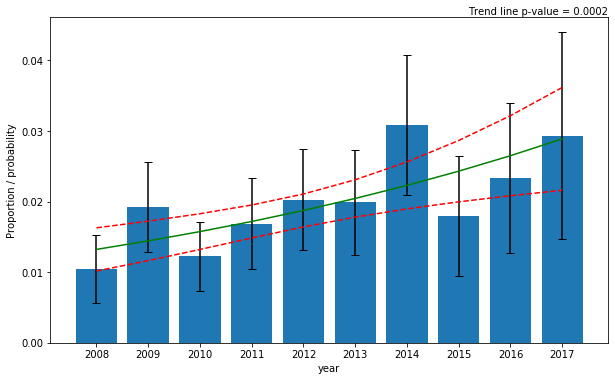

In [11]:
phjDiseaseDF = pd.DataFrame({'year':[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                             'positive':[18,34,24,26,30,27,36,17,18,15,4],
                             'negative':[1695,1733,1929,1517,1449,1329,1130,928,753,496,325]})

phjDiseaseDF = epy.phjAnnualDiseaseTrend(phjDF = phjDiseaseDF.loc[phjDiseaseDF['year'] < 2018,:],
                                         phjYearVarName = 'year',
                                         phjPositivesVarName = 'positive',
                                         phjNegativesVarName = 'negative',
                                         phjTotalVarName = None,
                                         phjConfIntMethod = 'normal',
                                         phjAlpha = 0.05,
                                         phjPlotProportions = True,
                                         phjPlotPrediction = True,
                                         phjGraphTitleStr = None,
                                         phjPrintResults = False)

---

## FILE: phjCleanUKPostcodes.py

### FUNCTION: phjCleanUKPostcodeVariable()

#### Clean postcodes based on format alone

In [8]:
import re

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = None,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'format',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

                        postcode  pcdClean  pcd7  postcodeOutward  \
0                         NP45DG       NaN   NaN              NaN   
1                        CH647TE       NaN   NaN              NaN   
2                        CH5 4HE       NaN   NaN              NaN   
3                        GIR 0AA       NaN   NaN              NaN   
4                       NOT NOWN       NaN   NaN              NaN   
5                         GIR0AB       NaN   NaN              NaN   
6                         NOR12A       NaN   NaN              NaN   
7                        no idea       NaN   NaN              NaN   
8                        W1A 1AA       NaN   NaN              NaN   
9                         missin       NaN   NaN              NaN   
10                      NP4  OGH       NaN   NaN              NaN   
11                      P012 OLL       NaN   NaN              NaN   
12                          p01s       NaN   NaN              NaN   
13              

/Users/philipjones/Documents/python_venvs/gen_python37_venv/venv37/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Clean postcodes based on real postcode and identify closest matches

In [10]:
import re

# N.B. When calculating best alternative postcodes, only postcodes that are within
# 1 DL distance are considered.

# Create a Pandas series that could contain all the postcodes in the UK
realPostcodesSer = pd.Series(['NP4 5DG','CH647TE','CH5 4HE','W1A 1AA','NP4 0GH','PO120LL','AB123CF','AB124DF','AB123CV'])

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = realPostcodesSer,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'dictionary',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

                        postcode  pcdClean  pcd7  postcodeOutward  \
0                         NP45DG       NaN   NaN              NaN   
1                        CH647TE       NaN   NaN              NaN   
2                        CH5 4HE       NaN   NaN              NaN   
3                        GIR 0AA       NaN   NaN              NaN   
4                       NOT NOWN       NaN   NaN              NaN   
5                         GIR0AB       NaN   NaN              NaN   
6                         NOR12A       NaN   NaN              NaN   
7                        no idea       NaN   NaN              NaN   
8                        W1A 1AA       NaN   NaN              NaN   
9                         missin       NaN   NaN              NaN   
10                      NP4  OGH       NaN   NaN              NaN   
11                      P012 OLL       NaN   NaN              NaN   
12                          p01s       NaN   NaN              NaN   
13              

NameError: ("name 'pyxdl' is not defined", 'occurred at index 3')

### FUNCTION: phjPostcodeFormat7()

---

## FILE: phjCleanData

### FUNCTION: phjParseDateVar()

---

## FILE: phjExploreData

### FUNCTION: phjViewLogOdds()
Example of viewing log odds plotted against mid-point of categories.

#### Categorise using Jenks breaks and using 'yes' and 'no' as binary outcome

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 'yes',
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 5,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'jenks',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

#### Categorise using quantile breaks and using 1 and 0 as binary outcome

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':[1]*50000 + [0]*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 1,
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 8,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'quantile',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

### FUNCTION: phjCategoriseContinuousVariable()

---

## FILE: phjRROR

### FUNCTION: phjOddsRatio()

### FUNCTION: phjRelativeRisk()

---

## FILE: phjSelectData.py

### FUNCTION: phjSelectCaseControlDataset()

#### Unmatched controls

In [ ]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting unmatched controls
unmatchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                              phjPotentialControlsDF = potControlsDF,
                                              phjUniqueIdentifierVarName = 'animalID',
                                              phjMatchingVariablesList = None,
                                              phjControlsPerCaseInt = 2,
                                              phjPrintResults = False)

print(unmatchedDF)

#### Matched controls

In [ ]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting controls that are matched to cases on variable 'sp'
matchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                            phjPotentialControlsDF = potControlsDF,
                                            phjUniqueIdentifierVarName = 'animalID',
                                            phjMatchingVariablesList = ['sp'],
                                            phjControlsPerCaseInt = 2,
                                            phjPrintResults = False)

print(matchedDF)

### FUNCTION: phjGenerateCaseControlDataset()

### FUNCTION: phjCollapseOnPatientID()

---

## File: phjCalculateProportions.py

---

## File: phjExploreData.py

### Function: phjCategoriseContinuousVariable()

#### Return dataframe alone

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                phjContinuousVarName = 'riskFactorCont',
                                                phjMissingValue = 'missing',
                                                phjNumberOfCategoriesInt = 6,
                                                phjNewCategoryVarName = 'catVar',
                                                phjCategorisationMethod = 'jenks',
                                                phjReturnBreaks = False,
                                                phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nLog odds for categorised variable')
    print(phjTempDF)

#### Return dataframe and list of breaks

In [ ]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF, phjBreaksList = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                               phjContinuousVarName = 'riskFactorCont',
                                                               phjMissingValue = 'missing',
                                                               phjNumberOfCategoriesInt = 6,
                                                               phjNewCategoryVarName = 'catVar',
                                                               phjCategorisationMethod = 'jenks',
                                                               phjReturnBreaks = True,
                                                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nCategorised variable')
    print(phjTempDF)
    print('\n')
    print('Breaks')
    print(phjBreaksList)

---